In [242]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
def f(x):
    return 3*x**2+5*x + 6

In [244]:
f(23)

1708

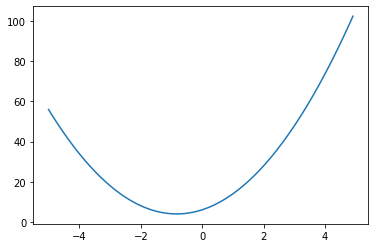

In [245]:
xs = np.arange(-5,5,0.1)
ys = f(xs)
plt.plot(xs,ys)

In [246]:
h = 0.0001
x= 3.0
(f(x + h)-f(x))/h

23.0003000000778

In [247]:
#more copmplex
a = 2.0 
b = 6.0 
c = 7.0
d = a*b + c
print(d)

19.0


In [248]:
h = 0.0001
#more copmplex
a = -2.0 
b = 6.0 
c = 7.0
d1 = a*b + c
a += h
d2 = a*b +c
print(d1)
print(d2)
print('slope', (d2-d1)/h)

-5.0
-4.9994
slope 6.00000000000378


In [249]:
class Value:
    
    def __init__(self, data, _children = (), _op ='', label=''):
        self.data = data
        self.grad= 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # define addition
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
              self.grad += 1.0 * out.grad #using plus-eqauls lets us accumulate the gradient instead of just setting it(which could cause issues with repeated variables)
              other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    #define multipy
    def __mul__(self,other):
        out = Value(self.data * other.data, (self , other), '*')
        
        def _backward():
          self.grad += other.data * out.grad
          other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    #define tanh
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
          self.grad += (1 - t**2) * out.grad
        out._backward = _backward      
        return out
    
    def backward(self):
    
        topo = []
        visited = set()
        def build_topo(v):
          if v not in visited:
            visited.add(v)
            for child in v._prev:
              build_topo(child)
            topo.append(v)
        build_topo(self)
    
        self.grad = 1.0
        for node in reversed(topo):
          node._backward()
    
a = Value(2.0, label='a')
b = Value(-3.7, label= 'b')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
c = Value(10.0,label = 'c')
e = a+b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
#a.__add__(b.__mul__(c))



Value(data=-16.6)

In [250]:
import graphviz
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad % 4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

All grads are with respect to L (dd/dL) or (da/dL)

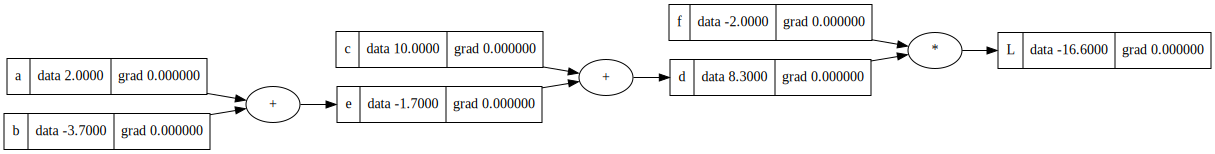

In [251]:
draw_dot(L)

In [252]:
L.grad = 1.0 
d.grad = -2.0
f.grad = 8.3
c.grad = -2.0
e.grad = -2.0
b.grad =  e.grad * 2.0

In [253]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c 
L = d * f
print(L.data)

-4.7925


In [254]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.7, label= 'b')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    c = Value(10.0,label = 'c')
    e = a+b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1  = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.7, label= 'b')  
    c = Value(10.0+h,label = 'c')
    e = a+b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)
    
lol()

-1.9999999999953388


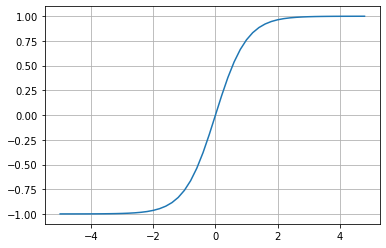

In [255]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [256]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label ='out'

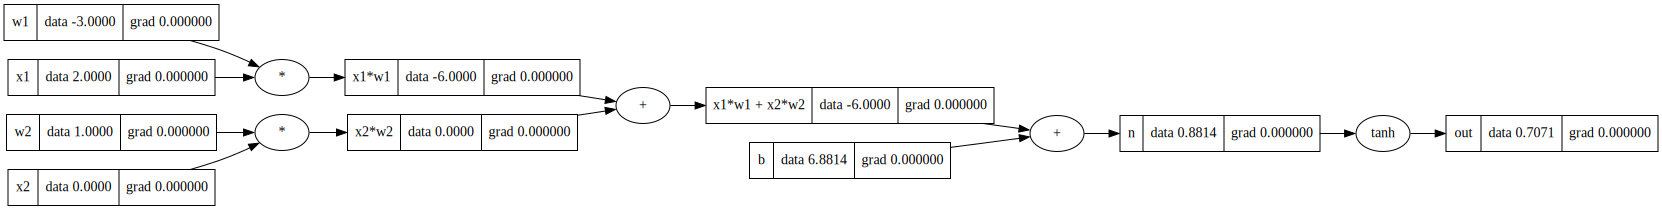

In [257]:
draw_dot(o)

In [258]:
o.backward() 

In [259]:
""""
o.grad =1.0

topo = []
visited = set()
def build_topo(v): # starts at output, if it not visited it marks it as visited
  if v not in visited:
    visited.add(v)
    for child in v._prev: # iterates thru all the children and then adds to itself, allows for
      build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
      node._backward()
"""

'"\no.grad =1.0\n\ntopo = []\nvisited = set()\ndef build_topo(v): # starts at output, if it not visited it marks it as visited\n  if v not in visited:\n    visited.add(v)\n    for child in v._prev: # iterates thru all the children and then adds to itself, allows for\n      build_topo(child)\n    topo.append(v)\nbuild_topo(o)\n\nfor node in reversed(topo):\n      node._backward()\n'

In [260]:
topo = []
visited = set()
def build_topo(v): # starts at output, if it not visited it marks it as visited
  if v not in visited:
    visited.add(v)
    for child in v._prev: # iterates thru all the children and then adds to itself, allows for
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

# now we can call ._backward on all the nodes in a topological order (in the commented out cell above)

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [261]:
#o.grad = 1.0 # initialising our base case

In [262]:
#o._backward()

In [263]:
#n._backward()

In [264]:
#b._backward() # nothing happens

In [265]:
#x1w1x2w2._backward()

In [266]:
#x1w1._backward()
#x2w2._backward()

"""
o.grad = 1.0

n.grad = 1 - o.data**2 # o.data = n.tanh

b.grad = n.grad

x1w1x2w2.grad = n.grad # cause + operation

x1w1.grad = x1w1x2w2.grad # cause + operation
x2w2.grad = x1w1x2w2.grad

w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad # 0 because x2 = 0, meaning wiggling the weight wont have any effect as it is nullyfied by the input x2
x2.grad = w2.data * x2w2.grad

"""

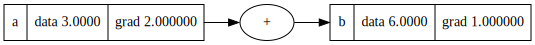

In [267]:
# making the bug surface in the backward functions (can be fixed in the value class by changing the grad setting =, to accumulating +=)

a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

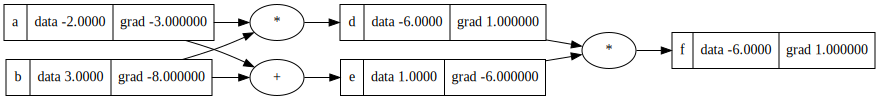

In [268]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)